In [1]:
import config
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams.update({'figure.figsize': (12, 7), 'figure.dpi': 100})

In [32]:
# Load the original raw dataset
raw_data = pd.read_csv(config.RAW_DATA_FILE)

# Load the final results summary
results_df = pd.read_csv(config.RESULTS_DIR / 'model_performance_summary.csv')

# Load the 3 processed datasets
original_y = pd.read_csv(config.PROCESSED_DATA_DIR / 'y_original_train.csv')
removed_y = pd.read_csv(config.PROCESSED_DATA_DIR / 'y_removed_train.csv')
capped_y = pd.read_csv(config.PROCESSED_DATA_DIR / 'y_capped_train.csv')

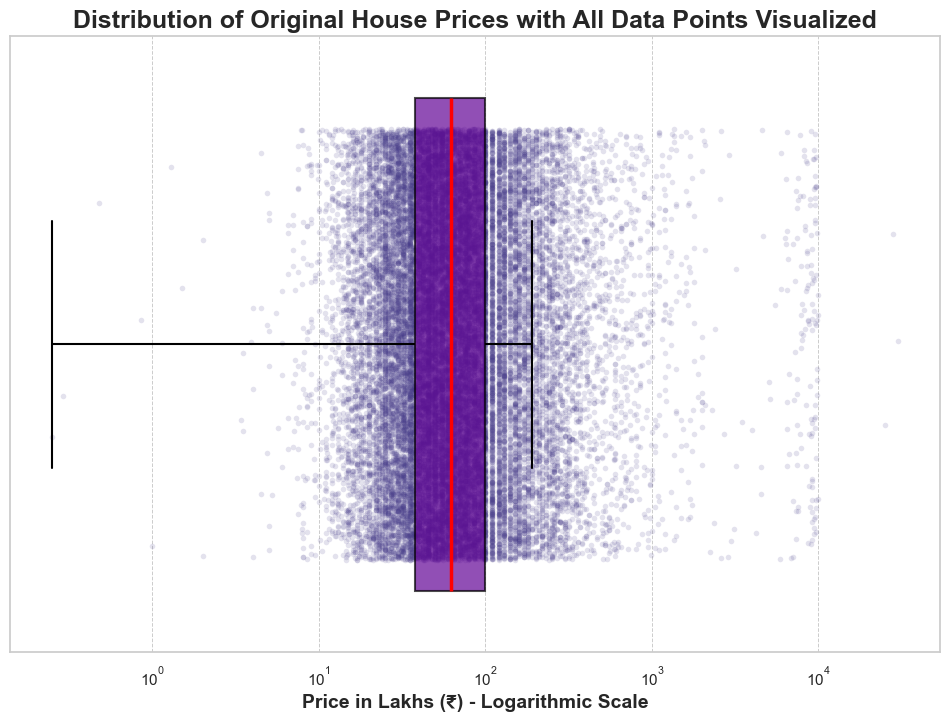

In [31]:
# Create a visualisation of the distribution of original house prices
plt.figure(figsize=(12, 8))

box_props = {
    'facecolor': '#620496', 
    'edgecolor': 'black', 
    'alpha': 0.7,
    'linewidth': 1.5
}
median_props = {
    'color': 'red', 
    'linewidth': 2.5
}
whisker_props = {
    'color': 'black', 
    'linewidth': 1.5
}

sns.stripplot(
    x=raw_data[config.TARGET_VARIABLE],
    jitter=0.35,
    alpha=0.15, 
    size=4,
    color='darkslateblue',
    zorder=1  
)

sns.boxplot(
    x=raw_data[config.TARGET_VARIABLE],
    showfliers=False,
    boxprops=box_props,
    medianprops=median_props,
    whiskerprops=whisker_props,
    capprops=whisker_props,
    zorder=2
)

plt.title('Distribution of Original House Prices with All Data Points Visualized', fontsize=18, fontweight='bold')
plt.xlabel('Price in Lakhs (₹) - Logarithmic Scale', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.yticks([])
plt.xscale('log')
plt.grid(True, which="major", ls="--", linewidth=0.7)

plt.savefig(config.RESULTS_DIR / 'figure_1_price_distribution.png', bbox_inches='tight')

plt.show()

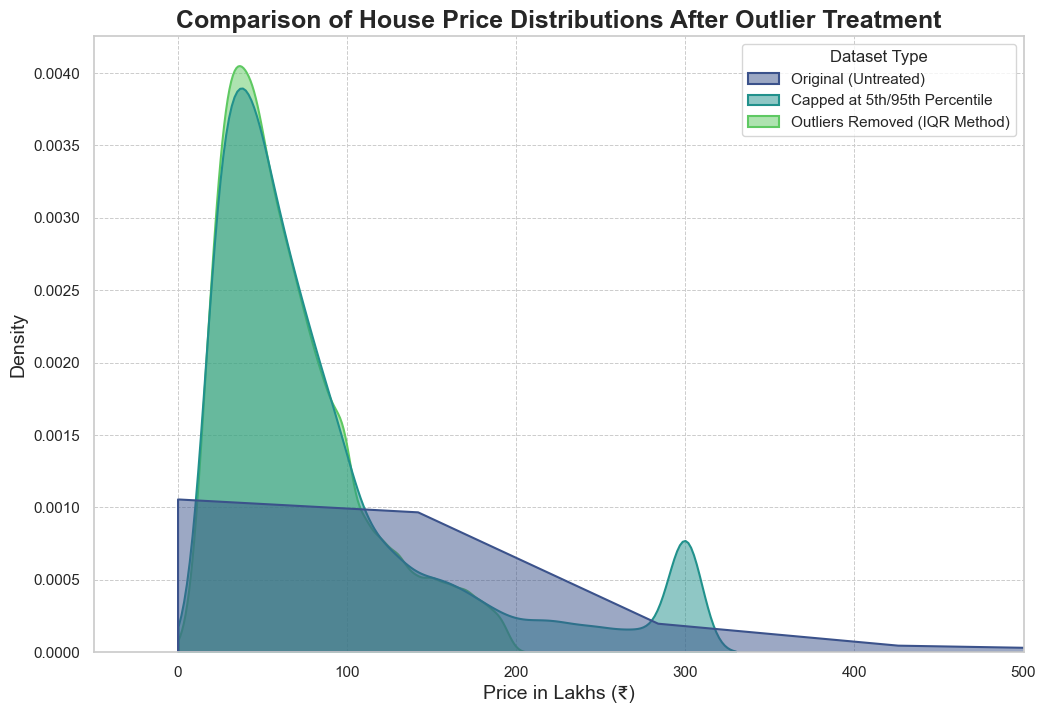

In [37]:
# Visualisation of the comparative density

df_orig = pd.DataFrame({
    'Price': pd.Series(original_y.values.flatten()), 
    'Dataset Type': 'Original (Untreated)'
})
df_cap = pd.DataFrame({
    'Price': pd.Series(capped_y.values.flatten()), 
    'Dataset Type': 'Capped at 5th/95th Percentile'
})
df_rem = pd.DataFrame({
    'Price': pd.Series(removed_y.values.flatten()), 
    'Dataset Type': 'Outliers Removed (IQR Method)'
})

combined_df = pd.concat([df_orig, df_cap, df_rem], ignore_index=True)

plt.figure(figsize=(12, 8))

sns.kdeplot(
    data=combined_df,
    x='Price',
    hue='Dataset Type',
    hue_order=['Original (Untreated)', 'Capped at 5th/95th Percentile', 'Outliers Removed (IQR Method)'],
    palette='viridis',
    fill=True,
    alpha=0.5,
    linewidth=1.5,
    clip=(0, 30000)
)

plt.title(
    'Comparison of House Price Distributions After Outlier Treatment', 
    fontsize=18, 
    fontweight='bold'
)

plt.xlabel('Price in Lakhs (₹)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xlim(-50, 500)
plt.grid(True, which="both", ls="--", linewidth=0.7)

plt.savefig(config.RESULTS_DIR / 'figure_2_treatment_effect_distribution.png', bbox_inches='tight')

plt.show()

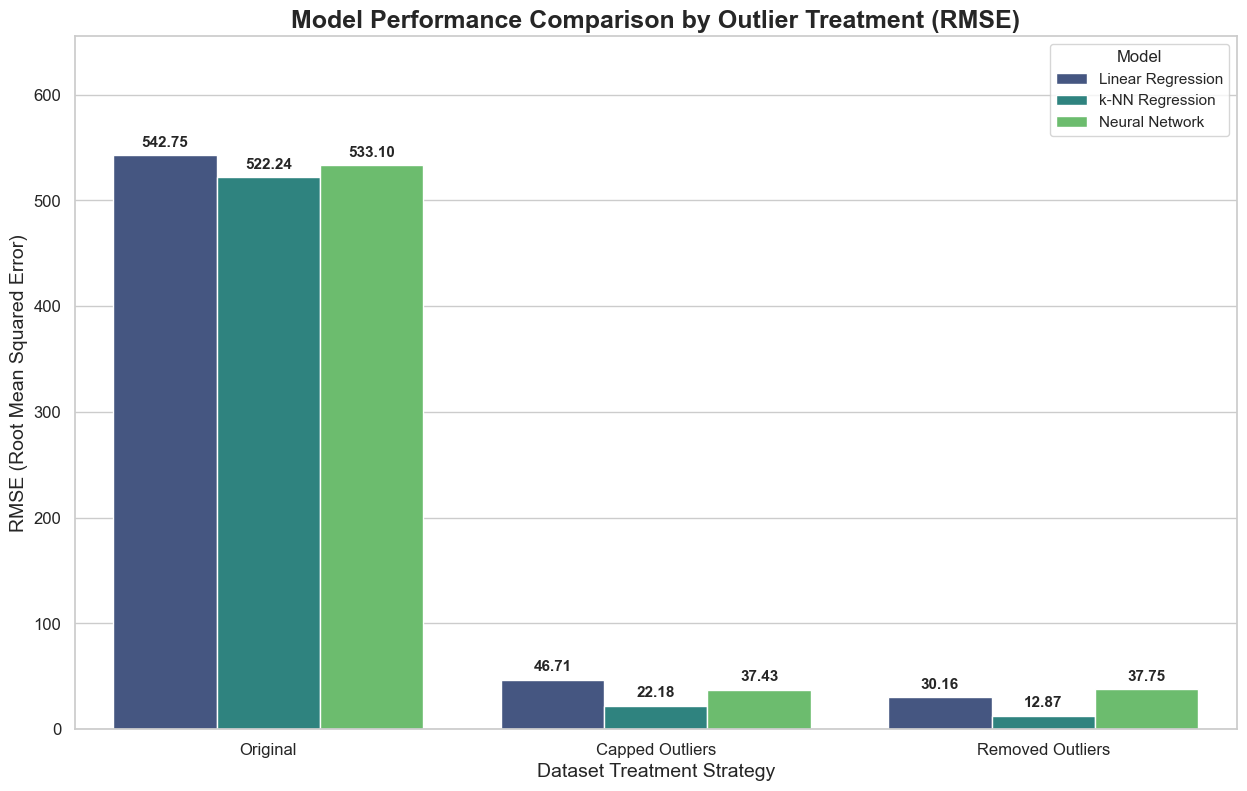

In [39]:
# Create grouped bar chart for model performance
plt.figure(figsize=(15, 9))

ax = sns.barplot(
    data=results_df,
    x='Dataset',
    y='RMSE',
    hue='Model',
    palette='viridis',
    order=['Original', 'Capped Outliers', 'Removed Outliers']
)

for p in ax.patches:
  if p.get_height() > 0:
    ax.annotate(
      format(p.get_height(), '.2f'),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center',
      xytext=(0, 9),
      textcoords='offset points',
      fontweight='bold',
      fontsize=11,
    )

plt.title('Model Performance Comparison by Outlier Treatment (RMSE)', fontsize=18, fontweight='bold')
plt.xlabel('Dataset Treatment Strategy', fontsize=14)
plt.ylabel('RMSE (Root Mean Squared Error)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model', fontsize=11, loc='upper right')

plt.ylim(0, ax.get_ylim()[1] * 1.15)

plt.savefig(config.RESULTS_DIR / 'figure_3_model_performance_comparison.png', bbox_inches='tight')
plt.show()
